In [1]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [3]:
def fib_memo(n, memo):
    if n in memo:
        return memo[n]

    if n == 0:
        f = 0
    elif n == 1:
        f = 1
    else:
        f = fib_memo(n-1, memo) + fib_memo(n-2, memo)

    memo[n] = f
    return f

In [4]:
memo = {}
fib_memo(40, memo)

102334155

In [5]:
def multiply_matrices(matrix1, matrix2):
    # Initialize the result matrix as a 2x2 matrix with zeros
    result = [[0, 0], [0, 0]]

    # Matrix multiplication formula
    for i in range(2):
        for j in range(2):
            for k in range(2):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result

In [6]:
def dyv_matrices(A, n):
    if n == 0:
        return [[1, 0], [0, 1]]
    else:
        if n%2 == 0:
            r = dyv_matrices(A, n/2)
            return multiply_matrices(r, r)
        else:
            r = dyv_matrices(A, (n-1)/2)
            return multiply_matrices(multiply_matrices(r, r), A)

A = [[1, 1],[1, 0]]
dyv_matrices(A, 39)

[[102334155, 63245986], [63245986, 39088169]]

In [7]:
def fib_matrices(n):
    A = [[1, 1],[1, 0]]
    return dyv_matrices(A, n - 1)[0][0]

fib_matrices(40)

102334155

Experiment for different values of n:


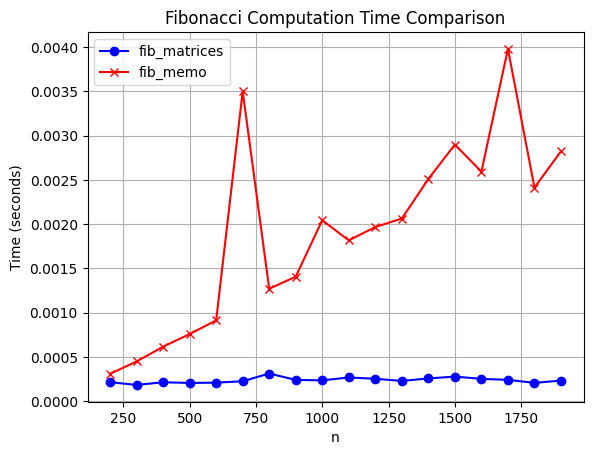

In [13]:
import time
import matplotlib.pyplot as plt


def measure_time():
    ns = [i for i in range(200, 2000, 100)]  # Larger n values to test
    fib_matrices_times = []
    fib_memo_times = []

    print("Experiment for different values of n:")

    for n in ns:
        # Timing fib_matrices
        start_time = time.time()
        fib_matrices(n)
        end_time = time.time()
        fib_matrices_time = end_time - start_time
        fib_matrices_times.append(fib_matrices_time)

        # Timing fib_memo
        memo = {}
        start_time = time.time()
        fib_memo(n, memo)
        end_time = time.time()
        fib_memo_time = end_time - start_time
        fib_memo_times.append(fib_memo_time)

    # Plotting the results
    plt.plot(ns, fib_matrices_times, label="fib_matrices", color='blue', marker='o')
    plt.plot(ns, fib_memo_times, label="fib_memo", color='red', marker='x')
    plt.xlabel('n')
    plt.ylabel('Time (seconds)')
    plt.title('Fibonacci Computation Time Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to run the experiment and plot
measure_time()